In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

0      96.1405
1      98.8555
2      99.3728
3      95.3462
4      95.5475
5     125.0470
6      98.0163
7      97.1787
8      96.6503
9      96.6034
10     93.0503
11     94.8262
12    100.3190
13    110.3700
14     94.7977
15     96.2404
16    100.4010
17     91.0259
18     98.1343
19     94.7187
20     97.0731
21     96.0952
22     93.8243
23     97.7347
24     97.4405
25     94.6808
26     96.0667
27     96.3952
28     96.2771
29     96.4383
30     96.1543
31     96.0252
32     97.2237
33     93.2419
34     99.2780
35     95.6547
36     95.7782
37     96.6139
38     96.2282
39     95.4735
40     94.5745
41     98.8848
42     91.4742
43     96.8511
44     96.2185
45     94.6801
46     98.4452
47     95.1840
48     95.9031
49     96.1842
Name: frame, dtype: float64
    cubes  threads     frame  updateVBO
0   40000        1   96.1405    51.2211
1   40000        1   98.8555    56.8637
2   40000        1   99.3728    52.5174
3   40000        1   95.3462    49.9451
4   40000        1   9

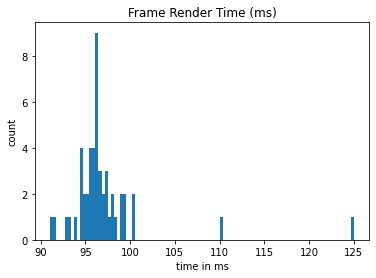

threads
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: frame, dtype: object

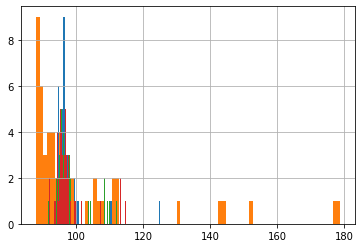

In [40]:
df = pd.read_csv('vulkan/time_vulkan.csv')
frames=df.frame[(df.threads==1) & (df.cubes>16)]
print(frames)

threads_1=df[df.threads==1]
print(threads_1)

threads_2=df[df.threads==2]
print(threads_2)

num_bins=100
fig,ax=plt.subplots()
n, bins, patches = ax.hist(frames, num_bins)
ax.set_xlabel('time in ms')
ax.set_ylabel('count')
ax.set_title('Frame Render Time (ms)')

plt.show()

data = df
data.groupby('threads').frame.hist(bins=80)

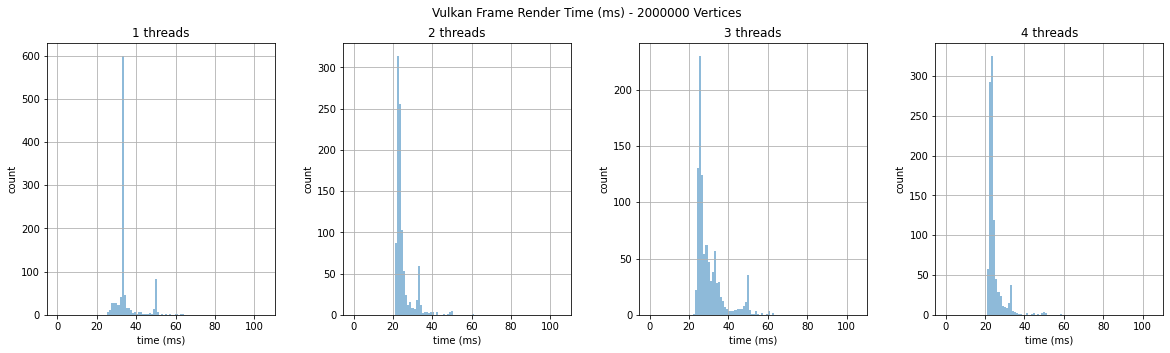

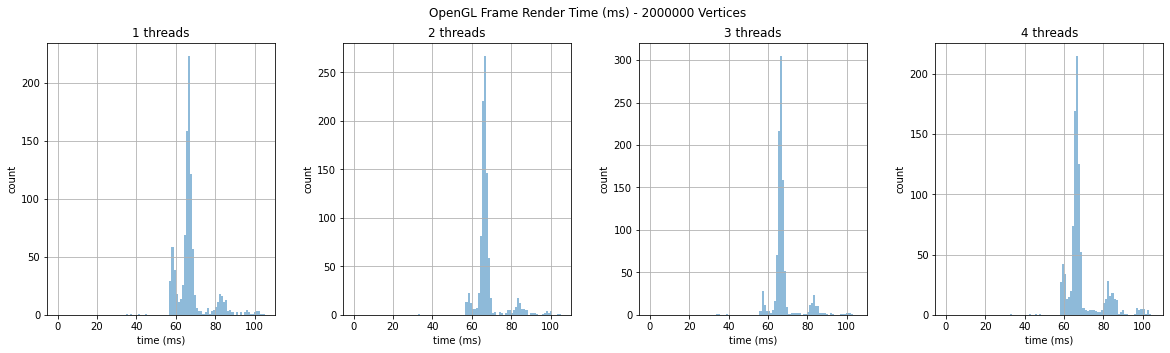

In [22]:
df_vulkan = pd.read_csv('time_vulkan_final.csv')
df_gl = pd.read_csv('time_gl_final.csv')

for df in [df_vulkan, df_gl]:
    z=np.abs(stats.zscore(df.frame))
    df.drop(df.index[np.where(z>3)[0]], inplace=True) # Make sure to have inplace=True

def plots(name,df):
    global df_vulkan
    global df_gl
    max_frame=max([df_vulkan.frame.max(),df_gl.frame.max()])

    x_label='time (ms)'
    y_label='count'
    
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    fig.suptitle('{} Frame Render Time (ms) - {} Vertices'.format(name,df.vertices.iloc[0]))
    for i in range(1,5):
        df[df.threads==i].hist('frame',bins=100,ax=ax[i-1],alpha=0.5,range=[0,max_frame])
        ax[i-1].set_xlabel(x_label)
        ax[i-1].set_ylabel(y_label)
        ax[i-1].set_title('{} threads'.format(i))
    plt.show()

#     fig,ax=plt.subplots(1,4,figsize=(20,5))
#     fig.suptitle('{} VBO Update Time (ms) - {} Vertices'.format(name,df.vertices.iloc[0]))
#     for i in range(1,5):
#         df[df.threads==i].hist('updateVBO',bins=100,ax=ax[i-1],alpha=0.5,range=[0,df.updateVBO.max()])
#         ax[i-1].set_xlabel(x_label)
#         ax[i-1].set_ylabel(y_label)
#         ax[i-1].set_title('{} threads'.format(i))
#     plt.show()

m = [df_vulkan.frame.max(), df_vulkan.updateVBO.max(),df_gl.frame.max(), df_gl.updateVBO.max()]

maximum=max(m)

plots('Vulkan',df_vulkan)
plots('OpenGL',df_gl)